In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir 

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [7]:
image_count

3670

In [8]:
roses=list(data_dir.glob('roses/*.jpg'))

In [9]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

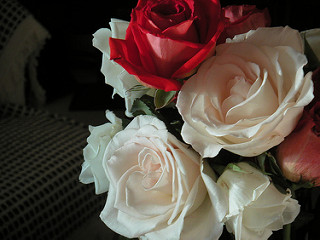

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
roses=len(list(data_dir.glob('roses/*.jpg')))
roses

641

In [16]:
tulips=list(data_dir.glob('tulips/*.jpg'))

In [13]:
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [14]:
tulips=len(list(data_dir.glob('tulips/*.jpg')))
tulips

799

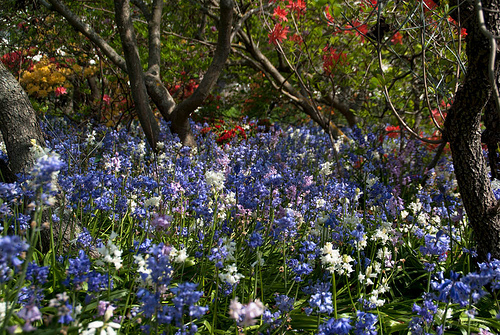

In [17]:
PIL.Image.open(str(tulips[1]))

In [18]:
daisy=len(list(data_dir.glob('daisy/*.jpg')))
daisy

633

In [19]:
sunflowers=len(list(data_dir.glob('sunflowers/*.jpg')))
sunflowers

699

In [20]:
dandelion=len(list(data_dir.glob('dandelion/*.jpg')))
dandelion

898

# Read flowers images from disk into numpy array using opencv

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [24]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][78]))

In [26]:
img.shape

(244, 320, 3)

In [27]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [28]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
x=np.array(x)
y=np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [31]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# Build convolutional neural network and train it

In [32]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10)              

Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.3410 - loss: 1.5764
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.5878 - loss: 1.0615
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.6839 - loss: 0.8245
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.7885 - loss: 0.5975
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 350ms/step - accuracy: 0.8447 - loss: 0.4305
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.9201 - loss: 0.2408
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - accuracy: 0.9625 - loss: 0.1344
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step - accuracy: 0.9801 - loss: 0.0695
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.9905 - loss: 0.0423
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 313ms/step - accuracy: 0.9862 - loss: 0.0512


In [33]:
model.evaluate(x_test_scaled,y_test)   # Data is overfit

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6471 - loss: 1.7823


[1.7777867317199707, 0.6503267884254456]

In [34]:
y_predictions = model.predict(x_test_scaled)
y_predictions[:10]

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


array([[6.1753388e-05, 9.9993336e-01, 4.8633242e-06, 3.1899015e-16,
        6.7600588e-08],
       [9.9998569e-01, 3.1632219e-06, 5.4263059e-11, 2.2129332e-10,
        1.1058128e-05],
       [2.9264833e-03, 4.7956160e-01, 5.1733023e-01, 5.9255408e-06,
        1.7571193e-04],
       [3.4568515e-01, 6.2806088e-05, 8.0219653e-09, 2.4902411e-06,
        6.5424955e-01],
       [5.2296864e-06, 5.9426437e-08, 9.9884123e-01, 1.0045054e-03,
        1.4900754e-04],
       [5.0908566e-05, 2.7154559e-10, 2.1552168e-04, 9.9970883e-01,
        2.4755240e-05],
       [3.9837627e-07, 8.6718806e-11, 4.1800171e-14, 1.5363475e-09,
        9.9999964e-01],
       [5.4744357e-01, 2.3684604e-02, 1.2554932e-01, 2.9049395e-02,
        2.7427313e-01],
       [5.8077669e-05, 9.5693404e-03, 2.0406099e-01, 7.5561565e-01,
        3.0695897e-02],
       [9.9578035e-01, 4.0524579e-09, 7.4755507e-13, 1.8268053e-13,
        4.2196289e-03]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_predictions]
y_classes[:10]

[1, 0, 2, 4, 2, 3, 4, 0, 3, 0]

In [36]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

# Improve Test Accuracy Using Data Augmentation

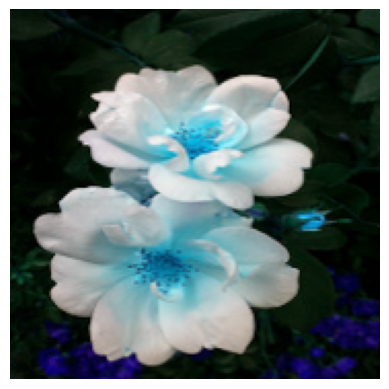

In [97]:
plt.axis('off')
plt.imshow(x[0])

In [108]:
# Define image dimensions
img_height = 180  # Replace with your image height
img_width = 180  # Replace with your image width

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.9),
    layers.RandomZoom(0.9),
])


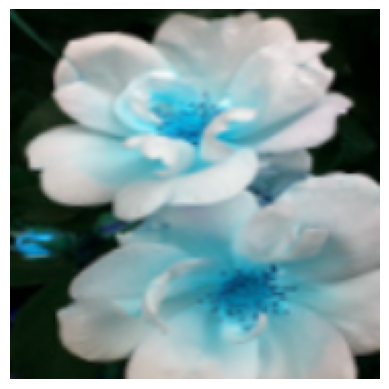

In [101]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

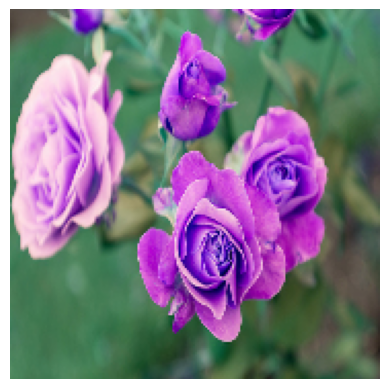

In [106]:
plt.axis('off')
plt.imshow(x[9])

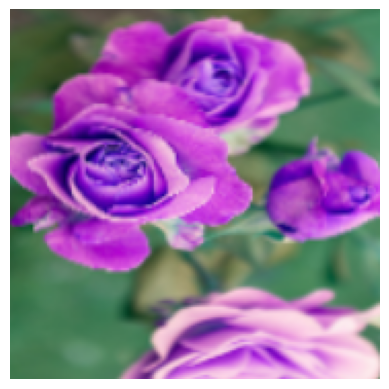

In [110]:
plt.axis('off')
plt.imshow(data_augmentation(x)[9].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [92]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='relu')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 501ms/step - accuracy: 0.1653 - loss: 1.6154
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 470ms/step - accuracy: 0.1723 - loss: 1.6094
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.1685 - loss: 1.6094
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - accuracy: 0.1671 - loss: 1.6094
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - accuracy: 0.1716 - loss: 1.6094
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 496ms/step - accuracy: 0.1726 - loss: 1.6094
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 536ms/step - accuracy: 0.1714 - loss: 1.6094
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 504ms/step - accuracy: 0.1662 - loss: 1.6094
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 493ms/step - accuracy: 0.1756 - loss: 1.6094
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 448ms/step - accuracy: 0.1810 - loss: 1.6094


In [93]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2046 - loss: 1.6094


[1.609437346458435, 0.1917211264371872]

In [94]:
y_predictions = model.predict(x_test_scaled)
y_predictions[:10]

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
y_classes = [np.argmax(element) for element in y_predictions]
y_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [96]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])